In [201]:
# Setting Up

# Data analysis and wrangling
import os
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Split & Scaling Dataset 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA 

# Regression Learning Techniques
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Performance evaluation tools
from sklearn.metrics import mean_squared_error




In [202]:
# Ignore the matching warnings to make output windows clean
import warnings
warnings.filterwarnings("ignore")

In [203]:
# Read File & Input data into Dataframe (by using python Pandas packages to work with datasets)
path = "."                                         # Selecting the current folder where the dataset is 
filename_read = os.path.join(path, "SM_Data.csv")
df = pd.read_csv(filename_read)                    # Acquiring the datasets into Pandas Dataframes

# Rename the columns for easy understanding 
df.rename(columns = {'I_y':'Load Current',
                     'PF':'Power Factor',
                     'e_PF':'Power Factor Error',
                     'd_if':'Excitation Current Change',
                     'I_f':'Excitation Current'}, inplace = True)

# Restyle the table and shows the first five row to check the raw data 
df.head().style.set_properties(**{'background-color': 'black','color': 'white','border-color': 'gray'})

,Load Current,Power Factor,Power Factor Error,Excitation Current Change,Excitation Current
0,3.000000,0.660000,0.340000,0.383000,1.563000
1,3.000000,0.680000,0.320000,0.372000,1.552000
2,3.000000,0.700000,0.300000,0.360000,1.540000
3,3.000000,0.720000,0.280000,0.338000,1.518000
4,3.000000,0.740000,0.260000,0.317000,1.497000


In [204]:
# Exploratory Data Analysis(EDA) - Find characteristics of the data

# To discover the features of original dataset
print(df.info())
print(f"Name of each columns in the dataset: {df.columns}")                    
print(f"Number of columns in the dataset: {len(df.columns)}")
# Five features in the datasets and all the features are numerical and continuous.

# To evaluate the missing, corrupt or misleading data
print(f"Number of missing values in each column: {df.isnull().sum()}")   
print(f"Number of duplicated values in each column: {df.duplicated().sum()}") 
# In general, Dataset are organised and no missing, corrupt or misleading data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Load Current               557 non-null    float64
 1   Power Factor               557 non-null    float64
 2   Power Factor Error         557 non-null    float64
 3   Excitation Current Change  557 non-null    float64
 4   Excitation Current         557 non-null    float64
dtypes: float64(5)
memory usage: 21.9 KB
None
Name of each columns in the dataset: Index(['Load Current', 'Power Factor', 'Power Factor Error',
       'Excitation Current Change', 'Excitation Current'],
      dtype='object')
Number of columns in the dataset: 5
Number of missing values in each column: Load Current                 0
Power Factor                 0
Power Factor Error           0
Excitation Current Change    0
Excitation Current           0
dtype: int64
Number of duplicated values in eac

In [205]:
# EDA - Basic statistics for each categorical columns (two ways: for loop and library)

# For loop to show the statistic characteristics about each feature in a string style
headers = list(df.columns.values)                                             
fields = []
for field in headers:
    fields.append({'name':field, 'mean':df[field].mean(),
                   'var':df[field].var(),'sdev':df[field].std()})
for field in fields:
    print(field) 

# Table shows the essential Statistic characteristics about each feature
df.describe().T.style.set_properties(**{'background-color': 'black',   
                           'color': 'white',
                           'border-color': 'gray'})

{'name': 'Load Current', 'mean': 4.499820466786356, 'var': 0.8028596799400701, 'sdev': 0.8960243746350153}
{'name': 'Power Factor', 'mean': 0.8252962298025146, 'var': 0.010800496622450723, 'sdev': 0.10392543780254536}
{'name': 'Power Factor Error', 'mean': 0.17470377019748645, 'var': 0.010800496622450688, 'sdev': 0.10392543780254519}
{'name': 'Excitation Current Change', 'mean': 0.35065888689407526, 'var': 0.03260404890019761, 'sdev': 0.18056591289664173}
{'name': 'Excitation Current', 'mean': 1.530658886894076, 'var': 0.03260404890019763, 'sdev': 0.18056591289664178}


,count,mean,std,min,25%,50%,75%,max
Load Current,557.000000,4.499820,0.896024,3.000000,3.700000,4.500000,5.300000,6.000000
Power Factor,557.000000,0.825296,0.103925,0.650000,0.740000,0.820000,0.920000,1.000000
Power Factor Error,557.000000,0.174704,0.103925,0.000000,0.080000,0.180000,0.260000,0.350000
Excitation Current Change,557.000000,0.350659,0.180566,0.037000,0.189000,0.345000,0.486000,0.769000
Excitation Current,557.000000,1.530659,0.180566,1.217000,1.369000,1.525000,1.666000,1.949000


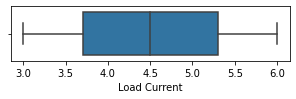

Number of Outlier: 0


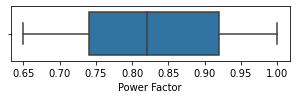

Number of Outlier: 0


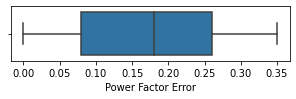

Number of Outlier: 0


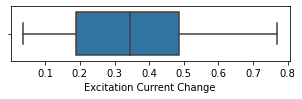

Number of Outlier: 0


In [206]:
# EDA - Outliers Checking (as regression models are sensitive to outliers)

# Function to determine the outlier. (IQR method)
outlier=[]
def IQR_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower = q1-(iqr*1.5)
    upper = q3+(iqr*1.5)
    for i in df:
        if i>upper or i<lower:
            outlier.append(i)
    print(f"Number of Outlier: {len(outlier)}")

# Function to visulize the outlier. (Boxplot)
def Box_plots(df):
    plt.figure(figsize=(5, 1))
    sns.boxplot(df)
    plt.show()

Box_plots(df['Load Current'])
IQR_outlier(df['Load Current'])

Box_plots(df['Power Factor'])
IQR_outlier(df['Power Factor'])

Box_plots(df['Power Factor Error'])
IQR_outlier(df['Power Factor Error'])

Box_plots(df['Excitation Current Change'])
IQR_outlier(df['Excitation Current Change'])

# The data are pretty straightforward without outliers. Hence, The function used to remove the outlier is unnecessary for this dataset

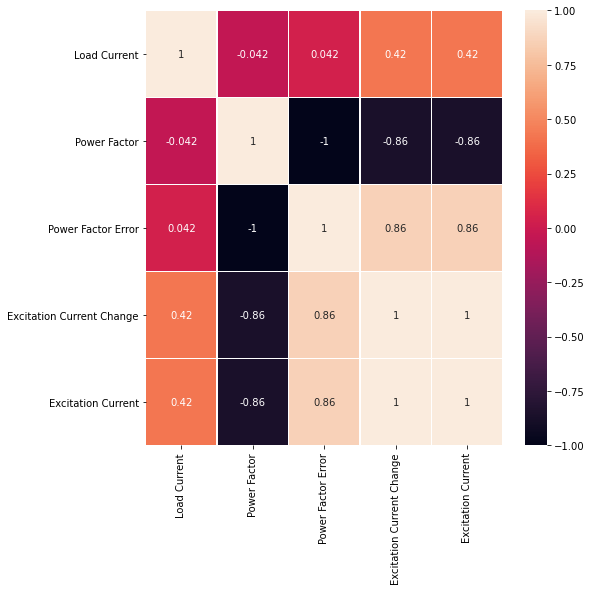

In [207]:
# EDA - Correlation Matrix - to discover the correlation between each feature 
plt.subplots(figsize=(8, 8))           # Adjust the figure size
corrMatrix = df.corr()                 # Calcualte the correlation by .corr function
sns.heatmap(corrMatrix,annot=True,linewidths=.5)  # 'annot' is True showing the values in each cell, 'linewidths' adjust distance between each cell
plt.show()
# Correlation Matrix shows that Excitation Current is perfectly correlated with Excitation Current Change.
# The lowest corrlation score is 0.42 for Load current and Excitation Current.

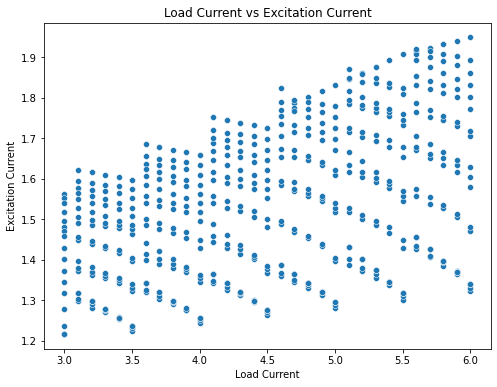

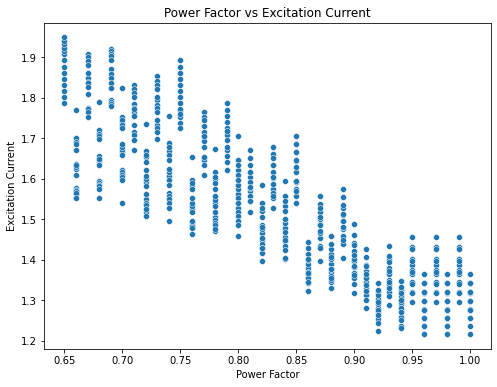

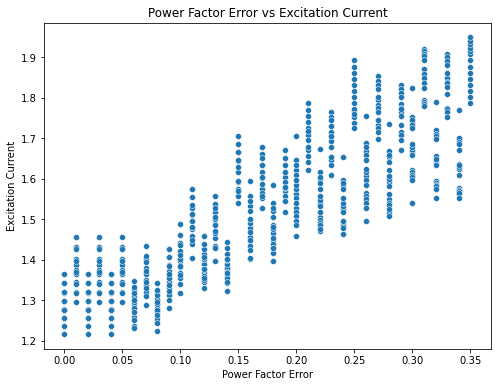

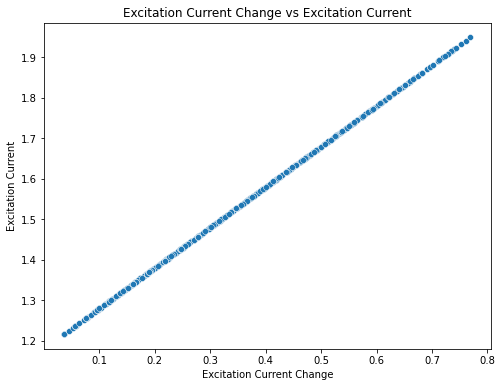

In [208]:
# EDA - Visualizing Relationship between all independent features to the target variable by using scatterplot
# Relationship between Load Current and the target feature, Excitation Current
plt.subplots(figsize=(8, 6))                       
plt.title('Load Current vs Excitation Current')
sns.scatterplot(x='Load Current',y='Excitation Current',data=df)       #Scatterplot diagram
plt.show()
# The relationship between Load Current and Excitation Current is positively linear

# Relationship between Power Factor and the target feature, Excitation Current
plt.subplots(figsize=(8, 6))   
plt.title('Power Factor vs Excitation Current')
sns.scatterplot(x='Power Factor',y='Excitation Current',data=df)
plt.show()
# The relationship between Power Factor and Excitation Current is negatively linear

# Relationship between Power Factor Error and the target feature, Excitation Current
plt.subplots(figsize=(8, 6))   
plt.title('Power Factor Error vs Excitation Current')
sns.scatterplot(x='Power Factor Error',y='Excitation Current',data=df)
plt.show()
# The relationship between Power Factor Error and Excitation Current is positively linear

# Relationship between Excitation Current Change and the target feature, Excitation Current
plt.subplots(figsize=(8, 6))   
plt.title('Excitation Current Change vs Excitation Current')
sns.scatterplot(x='Excitation Current Change',y='Excitation Current',data=df)
plt.show()
# The relationship Excitation Current Change and Excitation Current is perfectly linear


In [224]:
#Split DataSet

# Extract Independent Features (Load Current, Power Factor, Power Factor Error and Excitation Current Change)
X = df.drop(['Excitation Current Change','Excitation Current'],axis=1)    
# Extract Target Feature (Excitation Current)
y = df['Excitation Current']
# Omit Excitation Current Change as correlation between excitation current and excitation current change are perfect

# Split the dataset into training and testing set (30% testing set and 70% training set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state=42) # 'random_state' maintain the same values in train and test datasets eveytime 

print(X_train.shape)
print(X_test.shape)

# Feature Scaling 
scaler = StandardScaler() # Using standardscaler to bring every feature in the same footing without any upfront importance & prevent saturate too fast
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

(389, 3)
(168, 3)


In [210]:
# Dimensionality Reduction by using Principal Component Analysis
from sklearn.decomposition import PCA # Reduce Dimensions by Principal Component Analysis To Compensate
pca=PCA(n_components=1)   # Transformed data into one dimension of the principal component
pca.fit(X_train_scaled)
pca.fit(X_test_scaled)
X_pca_train=pca.transform(X_train_scaled)
X_pca_test=pca.transform(X_test_scaled)
print("original shape:   ", X_train.shape)
print("transformed shape of train data:", X_pca_train.shape)
print("transformed shape of test data:", X_pca_test.shape)

original shape:    (389, 3)
transformed shape of train data: (389, 1)
transformed shape of test data: (168, 1)


Root Mean Squared Error: 0.10719320545957248


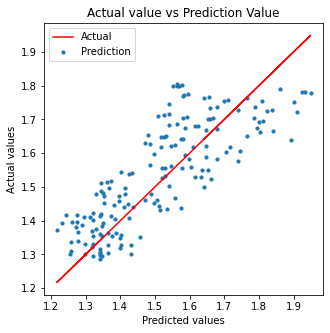

Root Mean Squared Error: 0.06543232258416191


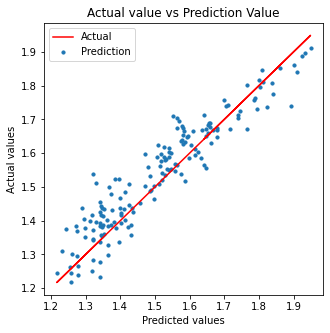

In [211]:
# First Technology - Linear Regression

# Linear Regression with PCA dimension reduction
model_linear = LinearRegression()        # Creating a linear regression model
model_linear.fit(X_pca_train, y_train)         # Fit the training data into the Linear regression model
prediction=model_linear.predict(X_pca_test)  # Predict the target value by using test data and trained linear regression model 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,prediction)))  # Calculting the RMSE to evaluating the performance of the model
# Visualize the model performance
plt.subplots(figsize=(5, 5))                             # Change the size of diagram
plt.scatter(y_test,prediction,label='Prediction',s=10)   # plotting the prediction values vs. actual values  
plt.plot(y_test,y_test,'r',label='Actual')               # draw a actual prediction line 
plt.title('Actual value vs Prediction Value')  
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend()
plt.show()

# Linear Regression without PCA dimension reduction
# As the input feature in this task is relatively low, therefore, trying to not reduce the dimension in order to increase the accuracy of the model
model_linear = LinearRegression()                   # Creating a linear regression model
model_linear.fit(X_train_scaled, y_train)           # Fit the training data into the Linear regression model
prediction=model_linear.predict(X_test_scaled)      # Predict the target value by using test data and trained linear regression model 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,prediction)))  # Calculting the RMSE to evaluating the performance of the model
# Visualize the model performance
plt.subplots(figsize=(5, 5))                             # Change the size of diagram
plt.scatter(y_test,prediction,label='Prediction',s=10)   # plotting the prediction values vs. actual values  
plt.plot(y_test,y_test,'r',label='Actual')               # draw a actual prediction line 
plt.title('Actual value vs Prediction Value')  
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend()
plt.show()

Root Mean Squared Error: 0.05295561933400098


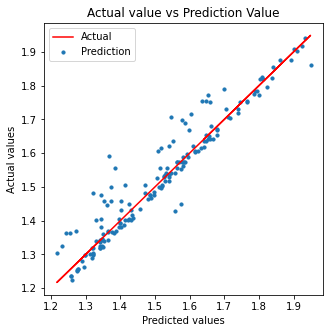

In [212]:
# Second Technology - Linear Regression
model_tree=DecisionTreeRegressor()                 # Creating a tree regression model
model_tree.fit(X_train_scaled, y_train)            # Fit the training data into the tree regression model
prediction=model_tree.predict(X_test_scaled)       # Predict the target value by test data and trained model
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,prediction)))  # Evaluating the RMSE value 

# Visualize the model performance
plt.subplots(figsize=(5, 5))                             # Change the size of diagram
plt.scatter(y_test,prediction,label='Prediction',s=10)   # plotting the prediction values vs. actual values  
plt.plot(y_test,y_test,'r',label='Actual')               # draw a actual prediction line 
plt.title('Actual value vs Prediction Value')  
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend()
plt.show()

,Number of Estimators,rmse_train_est,rmse_test_est,Difference between Training and Testing Results
0,50,0.008599,0.052581,83.646568
1,100,0.008599,0.051010,83.143062
2,150,0.008599,0.051443,83.284780
3,200,0.008599,0.051444,83.285247


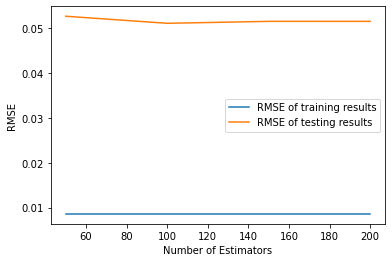

,Max_depth,rmse_train_depth,rmse_test_depth,Difference between Training and Testing Results
0,1,0.104466,0.103794,-0.647561
1,2,0.069058,0.070693,2.313103
2,3,0.045610,0.046862,2.671185
3,4,0.034259,0.037452,8.526097
4,5,0.024682,0.030362,18.707498
5,6,0.018807,0.027307,31.129181
6,7,0.012971,0.024684,47.451869
7,8,0.009627,0.023281,58.646180
8,9,0.008487,0.021587,60.685786


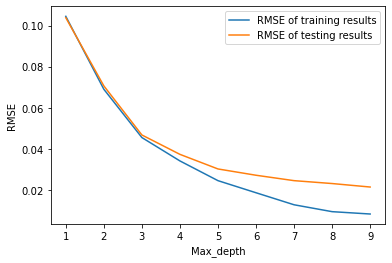

In [227]:
# Third Technology - Random Forest Regression - 1 

# Parameter Determining - As Random Forest Regression requires to set two parameters, finding the optimum values to reach higher accuracy

# Investigate optimum value for number of estimators 
model_rf_est=RandomForestRegressor(max_depth=4) # Setting a fixed value for max_depth in order to find the optimum number of estimators  
rmse_train_est=[]         # Creating a tuple for storage training result 
rmse_test_est=[]          # Creating a tuple for storage test result 
# Creating a for loop to test out the result with different numbers of estimators 
for x in [50,100,150,200]:              # Selecting several target number of estimators
    model_rf_est.n_estimators=x         # Bring each target value back to the model
    model_rf_est.fit(X_train_scaled,y_train)   # Fit the training data to train the model
    prediction_est=model_rf_est.predict(X_test_scaled)  # Predict the target value by using test data and trained model
    train_est=model_rf_est.predict(X_train_scaled)          # Bring the test data back to the model to find the training output
    rmse_train_est.append(np.sqrt(mean_squared_error(y_train,train)))     # Storage all the RMSE value about the training result
    rmse_test_est.append(np.sqrt(mean_squared_error(y_test,prediction_est)))  # Storage all the RMSE value about the test result
# Creating a table to show the results 
df_est=pd.DataFrame({'Number of Estimators':[50,100,150,200],'rmse_train_est':rmse_train_est,'rmse_test_est':rmse_test_est})        # Creating a dataframe to storage all the data
df_est['Difference between Training and Testing Results']=(((df_est['rmse_test_est']-df_est['rmse_train_est'])/df_est['rmse_test_est'])*100)    # Calculating the percentage difference between testing and training results
display(df_est)
# Visualize the results
sns.lineplot(x='Number of Estimators',y='rmse_train_est',data=df_est,label='RMSE of training results')  # ploting a a line to show the RMSE change for training results 
sns.lineplot(x='Number of Estimators',y='rmse_test_est',data=df_est,label='RMSE of testing results')    # ploting a a line to show the RMSE change for testing results 
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Investigate optimum value for max_depth
model_rf_depth=RandomForestRegressor(n_estimators=100) # Setting a fixed value for number of estimators in order to find the optimum max_depth,  
# Setting n_estimators = 100 as the RMSE difference between training and testing results are smallest
rmse_train_depth=[]         # Creating a tuple for storage training result 
rmse_test_depth=[]          # Creating a tuple for storage test result 
# Creating a for loop to test out the result with different max_depth
for x in np.arange(1,10,1):              # Selecting several target max_depth from 1 to 10 with step 1 
    model_rf_depth.max_depth=x         # Bring each target value back to the model
    model_rf_depth.fit(X_train,y_train)   # Fit the training data to train the model
    prediction_depth=model_rf_depth.predict(X_test)  # Predict the target value by using test data and trained model
    train_depth=model_rf_depth.predict(X_train)          # Bring the test data back to the model to find the training output
    rmse_train_depth.append(np.sqrt(mean_squared_error(y_train,train_depth)))     # Storage all the RMSE value about the training result
    rmse_test_depth.append(np.sqrt(mean_squared_error(y_test,prediction_depth)))  # Storage all the RMSE value about the test result
# Creating a table to show the results 
df_depth=pd.DataFrame({'Max_depth':np.arange(1,10,1),'rmse_train_depth':rmse_train_depth,'rmse_test_depth':rmse_test_depth})        # Creating a dataframe to storage all the data
df_depth['Difference between Training and Testing Results']=(((df_depth['rmse_test_depth']-df_depth['rmse_train_depth'])/df_depth['rmse_test_depth'])*100)    # Calculating the percentage difference between testing and training results
display(df_depth)
# Visualize the results
sns.lineplot(x='Max_depth',y='rmse_train_depth',data=df_depth,label='RMSE of training results')  # ploting a a line to show the RMSE change for training results 
sns.lineplot(x='Max_depth',y='rmse_test_depth',data=df_depth,label='RMSE of testing results')    # ploting a a line to show the RMSE change for testing results 
plt.ylabel('RMSE')
plt.legend()
plt.show()

Root Mean Squared Error: 0.047015825685089184


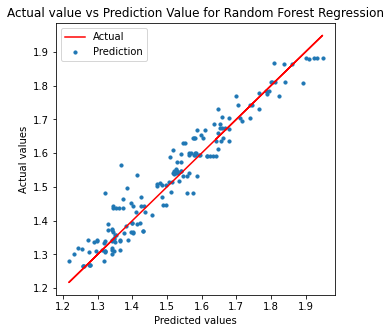

In [235]:
# Third Technology - Random Forest Regression - Final Model

model_rf_final=RandomForestRegressor(n_estimators=100,max_depth=5)    # Creating a final model with decided parameters
model_rf_final.fit(X_train_scaled,y_train)                             # Fit the training data into the random forest regression model
prediction_final=model_rf_final.predict(X_test_scaled)                 # Predict the target value by test data and trained model
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,prediction_final)))  # Evaluating the RMSE value 

# Visualize the model performance
plt.subplots(figsize=(5, 5))                                   # Change the size of diagram
plt.scatter(y_test,prediction_final,label='Prediction',s=10)   # plotting the prediction values vs. actual values  
plt.plot(y_test,y_test,'r',label='Actual')                     # draw a actual prediction line 
plt.title('Actual value vs Prediction Value for Random Forest Regression')  
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend()
plt.show()


In [ ]:
# Fourth Technology - Neural Networks
